# Spotify User Churn Analysis

This notebook explores the Spotify user dataset to analyze churn behavior. The analysis includes data exploration, visualization, and insights into user behavior based on various features.

In [7]:
pip install pandas

463.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 4.2 MB/s  0:00:02eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 4.9 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip instal numpy

477.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


ERROR: unknown command "instal" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install numpy

482.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Import Required Libraries

We start by importing the necessary libraries for data manipulation and visualization.

In [ ]:
df = pd.read_csv('spotify_churn_dataset.csv')

**Note:** Ensure this cell is executed before running any analysis to load the dataset into the variable `df`.

In [ ]:
# Verify the dataset is loaded correctly
print(df.head())

## Load the Dataset

The dataset is loaded into a pandas DataFrame for analysis.

In [ ]:
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


## Display the Dataset

Let's take a look at the dataset to understand its structure and contents.

In [47]:
df.head(30)

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,gender_Female,gender_Male,gender_Other,subscription_type_Family,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Desktop,device_type_Mobile,device_type_Web,ad_avoidance_rate
0,1,54,26,23,0.20,31,0,1,True,False,False,False,True,False,False,True,False,False,0.006250
1,2,33,141,62,0.34,0,1,0,False,False,True,True,False,False,False,False,False,True,0.340000
2,3,38,199,38,0.04,0,1,1,False,True,False,False,False,True,False,False,True,False,0.040000
3,4,22,36,2,0.31,0,1,0,True,False,False,False,False,False,True,False,True,False,0.310000
4,5,29,250,57,0.36,0,1,1,False,False,True,True,False,False,False,False,True,False,0.360000
5,6,17,219,35,0.46,13,0,0,True,False,False,False,True,False,False,True,False,False,0.032857
6,7,39,289,44,0.38,0,1,0,True,False,False,False,False,True,False,True,False,False,0.380000
7,8,41,210,68,0.11,5,0,0,True,False,False,False,True,False,False,False,True,False,0.018333
8,9,55,50,66,0.29,0,1,0,False,False,True,False,False,False,True,False,False,True,0.290000
9,10,44,278,94,0.38,44,0,0,False,True,False,False,True,False,False,False,True,False,0.008444


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


## Dataset Information

Check the dataset's structure, including column names, data types, and non-null counts.

In [ ]:
df.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

## Missing Values

Identify any missing values in the dataset.

In [ ]:
df.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


## Statistical Summary

Generate a statistical summary of the numerical columns in the dataset.

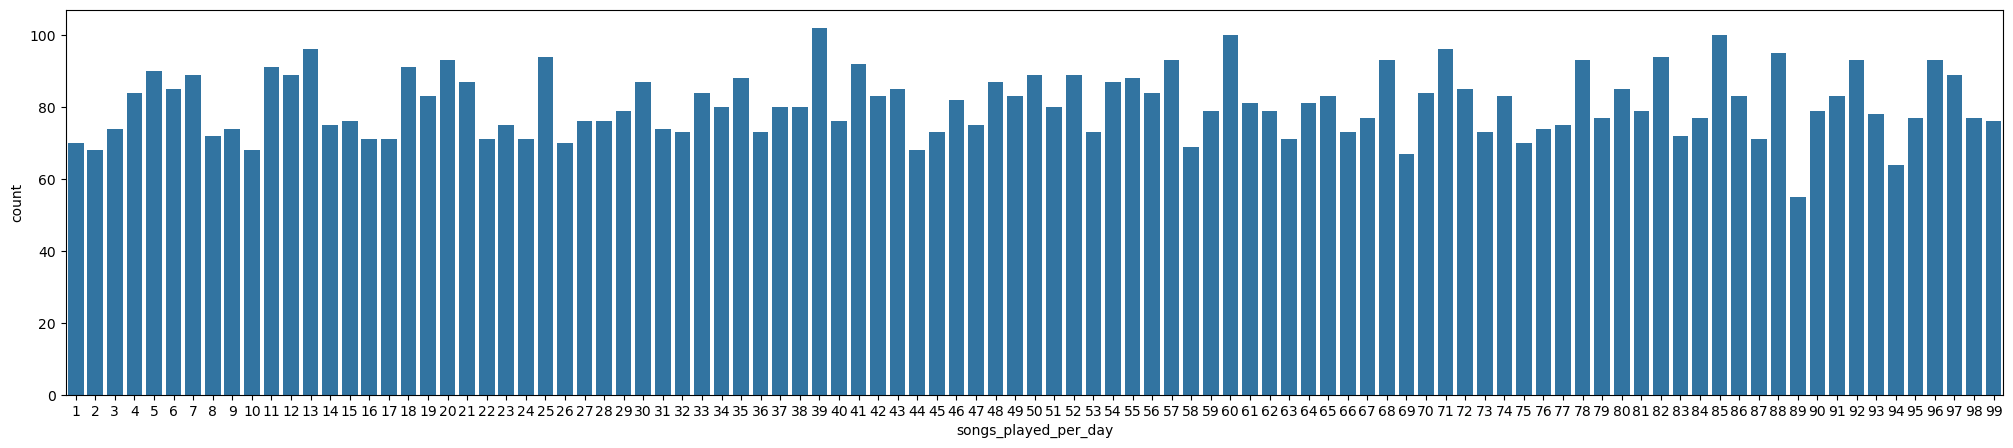

In [ ]:
plt.figure(figsize = (25,5))
sns.countplot(x = 'songs_played_per_day', data = df)
plt.show()

## Songs Played Per Day Distribution

Visualize the distribution of the number of songs played per day by users.

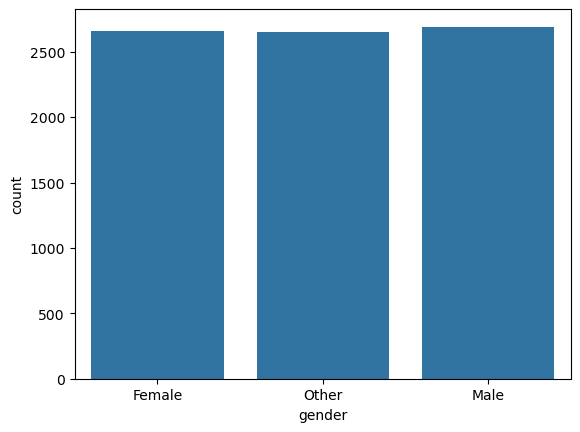

In [ ]:
sns.countplot(x = 'gender', data = df)
plt.show()

## Gender Distribution

Analyze the distribution of users by gender.

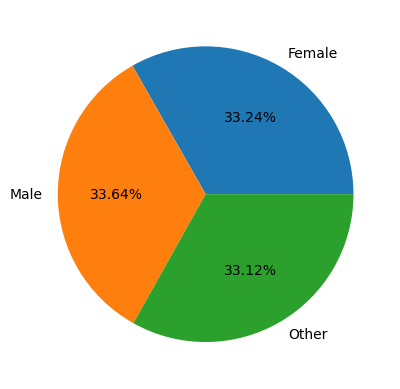

In [ ]:
gb = df.groupby("gender").agg({'gender':"count"})
plt.pie(gb['gender'], labels = gb.index, autopct = "%1.2f%%")
plt.show()

## Gender Proportion

Visualize the proportion of users by gender using a pie chart.

In [ ]:
# Select only the numerical columns
numerical_df = df[['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening', 'is_churned']]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

## Correlation Analysis

Calculate and visualize the correlation matrix for numerical features to identify relationships between variables.

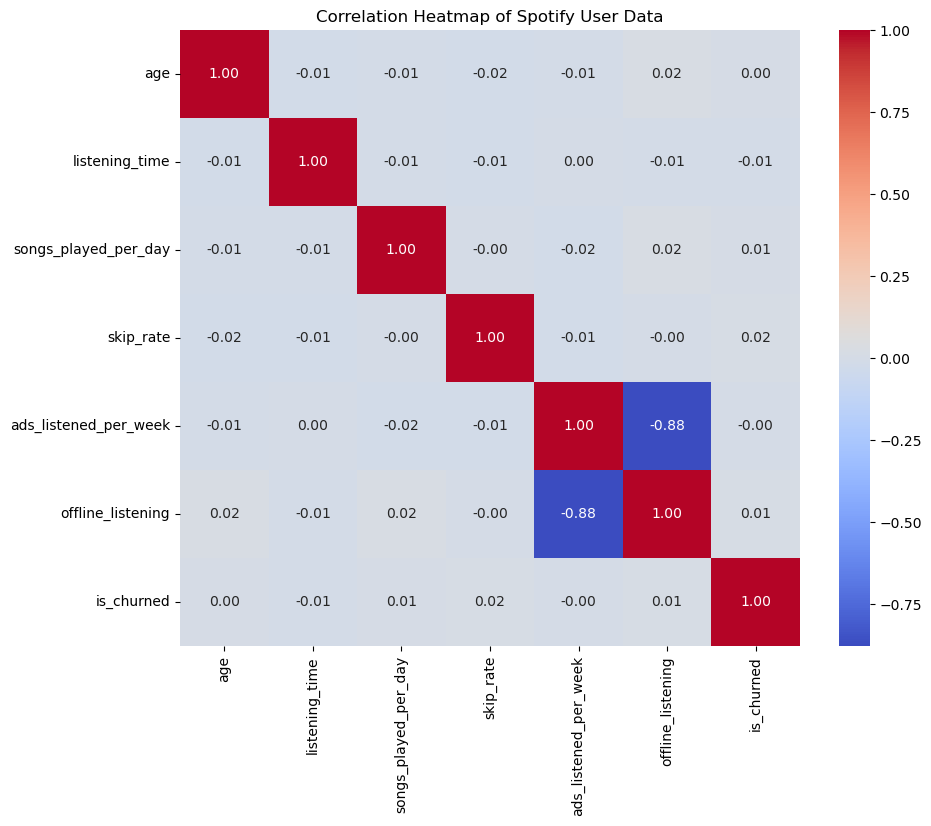

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Spotify User Data')
plt.show()

## Correlation Heatmap

A heatmap is used to visualize the correlation matrix for better understanding of feature relationships.

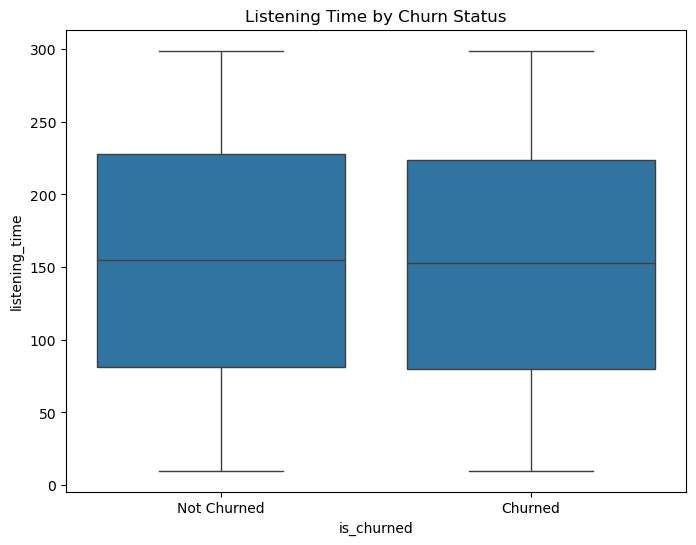

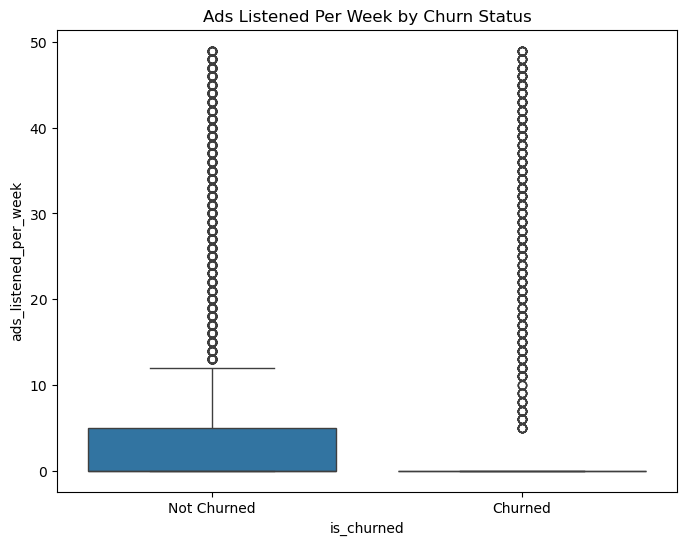

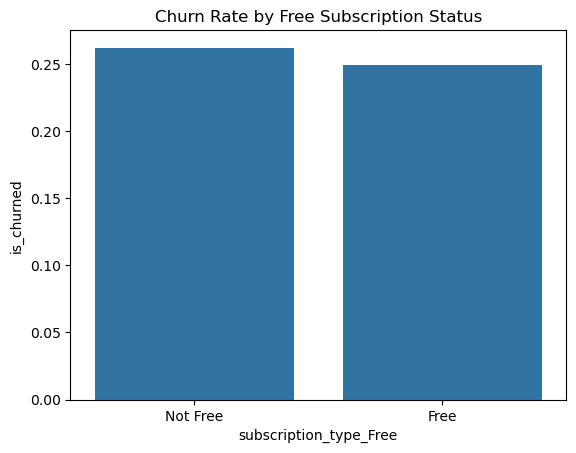

In [ ]:
# Create a new DataFrame for churned users and non-churned users
churned_df = df[df['is_churned'] == 1]
not_churned_df = df[df['is_churned'] == 0]

# Compare the average listening time for churned vs. non-churned users
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_churned', y='listening_time', data=df)
plt.title('Listening Time by Churn Status')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

# Compare the average ads listened per week
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_churned', y='ads_listened_per_week', data=df)
plt.title('Ads Listened Per Week by Churn Status')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

# You can also use a bar plot to see how different subscription types
# and device types contribute to churn.
churn_by_sub = df.groupby('subscription_type_Free')['is_churned'].mean().reset_index()
sns.barplot(x='subscription_type_Free', y='is_churned', data=churn_by_sub)
plt.title('Churn Rate by Free Subscription Status')
plt.xticks([0, 1], ['Not Free', 'Free'])
plt.show()

# You can repeat this for other categorical columns as well.

## Churn Analysis

Analyze the behavior of churned and non-churned users based on various features.